C:\Users\steph\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,36,37,39,40,43,44,46,47,48,49,52,53,54,55,62,63,66,67,110) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


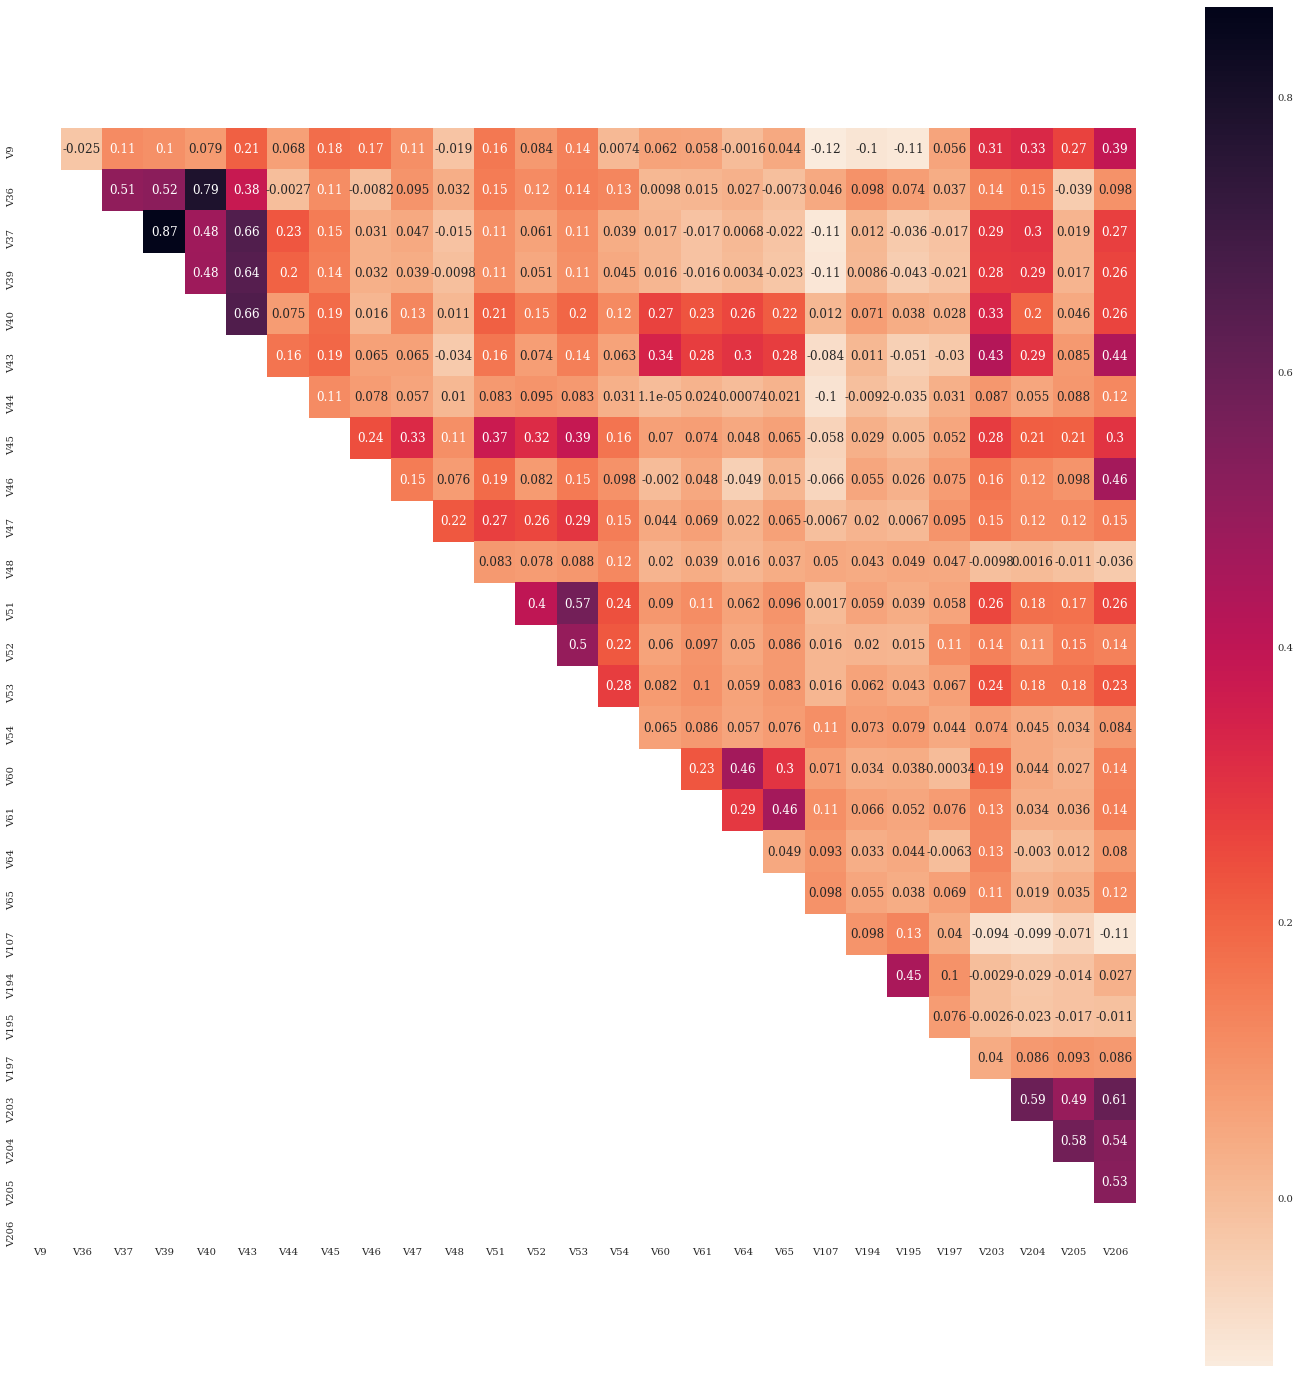

In [2]:
# our usual first step: get the modules loaded.
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))


import statsmodels.api as sm
import statsmodels.formula.api as smf

import sklearn.linear_model as sklm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score, classification_report, precision_score, accuracy_score, recall_score, f1_score

import seaborn as sns
from sklearn import tree
import graphviz

wvd = pd.read_csv('worldvalues-data.csv', usecols=['V9','V36','V37','V39','V40','V43','V44','V45','V46','V47','V48','V51','V52','V53','V54','V60','V61','V64','V65','V107','V194','V195','V197','V203','V204','V205','V206'])

wvd.replace('A lot worse off', 1, inplace=True)
wvd.replace('Completely disagree', 1, inplace=True)
wvd.replace('Never justifiable', 1, inplace=True)
wvd.replace('HT: Dropped out survey;BH,SG: Missing; RU: Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('HT: Dropped out survey;RU: Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('HT: Dropped out survey;BH,SG:Missing; DE,SE:Inapplicable; RU:Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('HT: Dropped out survey;SG:Missing; DE:Inapplicable; RU:Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('HT: Dropped out survey;DE,SE:Inapplicable; RU:Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('HT: Dropped out survey;BH,SG:Missing; RU:Inappropriate response{Inappropriate', -5, inplace=True)
wvd.replace('HT: Dropped out survey;BH,SG:Missing; RU:Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('HT:Dropped out survey;BH: Missing; RU,DE: Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('HT: Dropped out survey; RU: Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('BH:Missing;HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('BH:Missing;HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('BH: Missing; DE: Inapplicable; RU: Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('BH,HT: Missing; RU:Inappropriate response{Inappropriate}', -5, inplace=True)
wvd.replace('DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out', -5, inplace=True)
wvd.replace('DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}', -5, inplace=True)
wvd.replace('Not asked in survey', -4, inplace=True)
wvd.replace('Not asked', -4, inplace=True)
wvd.replace('Not applicable', -3, inplace=True)
wvd.replace('Not applicable (Not first choice)', -3, inplace=True)
wvd.replace('Not applicable (Not first choice){Not applicable}', -3, inplace=True)
wvd.replace('No answer', -2, inplace=True)
wvd.replace('Don\'t know', 'Dont know', inplace=True)
wvd.replace('Dont know', -1, inplace=True)

wvd = wvd.apply(pd.to_numeric)

plt.figure(figsize=(25, 25))
corrmat = wvd.corr()
mask = np.tril(wvd.corr())
sns.heatmap(corrmat,square = True, cmap="rocket_r",mask=mask, annot=True);


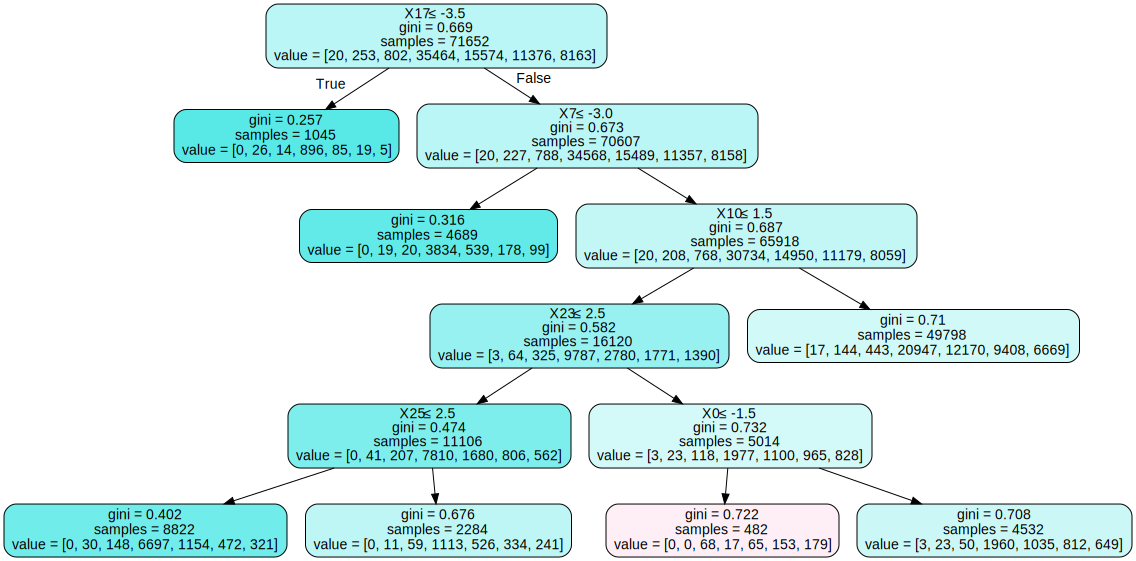

In [21]:
Y = wvd['V9']
X = wvd.drop(columns=['V9'])

wvd_reg=sklm.LinearRegression() 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=53)

wvd_reg.fit(X_train, Y_train)

clftree = tree.DecisionTreeClassifier(max_leaf_nodes=7, max_features=3, random_state=53)
clftree.fit(X_train,Y_train)

def print_tree(d_tree, f_names, c_names=None):
    dot_data = tree.export_graphviz(d_tree, out_file=None, 
                                    filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

graphClf = print_tree(d_tree=clftree, f_names=X.columns, c_names=['No', 'Yes'])
graphClf

In [14]:
formula='V9 ~ V36 + V37 + V39 + V40 + V43 + V44 + V45 + V46 + V47 + V48 + V51 + V52 + V53 + V54 + V60 + V61 + V64 + V65 + V107 + V194 + V195 + V197 + V203 + V204 + V205 + V206'
model = smf.ols(formula, data=wvd) 
m_reg = model.fit()
m_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     V9   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     929.2
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:40:20   Log-Likelihood:            -1.2645e+05
No. Observations:               89565   AIC:                         2.530e+05
Df Residuals:                   89538   BIC:                         2.532e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5456      0.023     67.593      0.000       1.501       1.590
V36           -0.0882      0.006    -13.917      0.000      -0.101      -0.076
V37           -0.0233      0.008     -2.757      0.006      -0.040      -0.007
V39           -0.0467      0.008     -5.768      0.000      -0.063      -0.031
V40            0.0021      0.006      0.363      0.717      -0.009       0.014
V43            0.1101      0.006     17.297      0.000       0.098       0.123
V44            0.0046      0.009      0.504      0.614      -0.013       0.022
V45            0.0427      0.004     10.806      0.000       0.035       0.050
V46            0.0083      0.003      3.229      0.001       0.003       0.013
V47            0.0294      0.004      8.275      0.000       0.022       0.036
V48           -0.0123      0.004     -3.297      0.001      -0.020      -0.005
V51            0.0406      0.003     11.703      0.000       0.034       0.047
V52           -0.0040      0.003     -1.174      0.240      -0.011       0.003
V53            0.0210      0.004      5.776      0.000       0.014       0.028
V54           -0.0232      0.003     -7.703      0.000      -0.029      -0.017
V60            0.0121      0.003      3.782      0.000       0.006       0.018
V61            0.0091      0.002      3.708      0.000       0.004       0.014
V64           -0.0468      0.003    -16.035      0.000      -0.053      -0.041
V65           -0.0198      0.002     -8.022      0.000      -0.025      -0.015
V107          -0.0338      0.002    -14.726      0.000      -0.038      -0.029
V194          -0.0263      0.001    -21.934      0.000      -0.029      -0.024
V195          -0.0201      0.001    -16.872      0.000      -0.022      -0.018
V197           0.0141      0.001     11.383      0.000       0.012       0.017
V203           0.0131      0.001      8.885      0.000       0.010       0.016
V204           0.0523      0.002     32.589      0.000       0.049       0.055
V205           0.0005      0.001      0.333      0.739      -0.002       0.003
V206           0.0622      0.001     46.919      0.000       0.060       0.065
==============================================================================
Omnibus:                     3805.203   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12862.677
Skew:                          -0.008   Prob(JB):                         0.00
Kurtosis:                       4.856   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

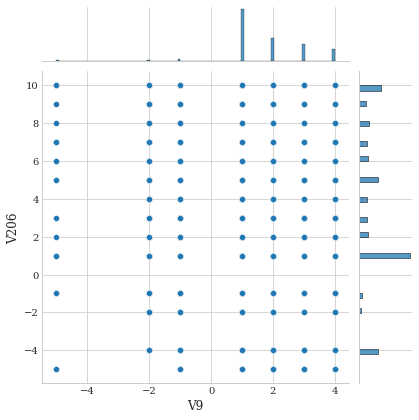

In [16]:
sns.jointplot(x = wvd.V9, y = wvd.V206);